In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
def new_figure () :
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    #ax.set_xlim3d(-2, 1.2)
    #ax.set_ylim3d(1, 7)
    #ax.set_zlim3d(0, 1.7)                                     
    #ax.view_init(50, -35)
    #ax.set_axis_off()
    return  fig, ax

def data_to_df (data, temps) :
    l=data.shape[1]-5
    datax=[]; datay=[]; dataz=[]
    for i in range (1,l,3):
        datax.append(data.loc[:,data.columns[i]][temps])  #extract all the x's from the first column and store them in datax list
        datay.append(data.loc[:,data.columns[i+1]][temps])  #extract all the y's from the first column and store them in datay list
        dataz.append(data.loc[:,data.columns[i+2]][temps])  #extract all the z's from the first column and store them in dataz list
    ar=np.array([datax,datay,dataz])
    df = pd.DataFrame(ar, index = ['x', 'y', 'z'])
    return df

def plot_all_sensors_with_names (data,ax):
    nb_sensors = len(data.columns)-5
    for i in range (0,nb_sensors):
        sensor_name = data.columns[i]
        x=data.loc[:,sensor_name][0]
        y=data.loc[:,sensor_name][1]
        z=data.loc[:,sensor_name][2]
        ax.scatter(x,y,z,s=200, marker='d', color="g")
        ax.text(x,y,z,'%s' % (sensor_name), size=20, zorder=1,)

def plot_all_sensors_with_numbers (data,ax):
    nb_sensors = len(data.columns)
    for i in range (0,nb_sensors):
        sensor_name = data.columns[i]
        x=data.loc[:,sensor_name][0]
        y=data.loc[:,sensor_name][1]
        z=data.loc[:,sensor_name][2]
        ax.scatter(x,y,z,s=20, marker='d', color="g")
        ax.text(x,y,z, '%s''%s' % ('  ',i+1), size=5, zorder=1,)


def plot_all_segments(data,ax) :
    for i in range (0,len(segments_right)) :
        ax.plot(data.loc[:,segments_right[i]].loc['x',:],data.loc[:,segments_right[i]].loc['y',:],data.loc[:,segments_right[i]].loc['z',:], color="b")
    for i in range (0,len(segments_left)) :
        ax.plot(data.loc[:,segments_left[i]].loc['x',:],data.loc[:,segments_left[i]].loc['y',:],data.loc[:,segments_left[i]].loc['z',:], color="r")
    for i in range (0,len(segments_axial)) :
        ax.plot(data.loc[:,segments_axial[i]].loc['x',:],data.loc[:,segments_axial[i]].loc['y',:],data.loc[:,segments_axial[i]].loc['z',:], color="k")



def plot_head (data,ax,temps) :
    x_head = data.loc[:,'Head x'][temps]
    y_head = data.loc[:,'Head y'][temps]
    z_head = data.loc[:,'Head z'][temps]
    ax.scatter(x_head,y_head,z_head,s=200, marker='o', color="k")


def animate(i):
    df= data_to_df (data, i*50)
    ax=new_figure()
    plot_all_sensors_with_numbers(df,ax)
    #plot_all_segments(df,ax)
    #plot_head (data,ax,i*50)
    #destroyWindow()


In [144]:
data = pd.read_csv ('P33__0_1.txt', delimiter="\t" , header=None)
print(data)

                                                    0
0   -1.390789337158203125e+02,-1.39061096191406250...
1   1.042917633056640625e+02,1.042920074462890625e...
2   1.127871093750000000e+02,1.127881240844726562e...
3   -1.382686920166015625e+02,-1.38250686645507812...
4   1.382358398437500000e+02,1.382360992431640625e...
5   1.116716766357421875e+02,1.116733627319335938e...
6   -1.416604003906250000e+02,-1.41642379760742187...
7   1.663199310302734375e+02,1.663201904296875000e...
8   1.117632064819335938e+02,1.117650527954101562e...
9   -1.392990875244140625e+02,-1.39281066894531250...
10  1.544804687500000000e+02,1.544807281494140625e...
11  1.117638702392578125e+02,1.117657165527343750e...
12  -1.434322662353515625e+02,-1.43419265747070312...
13  1.792008361816406250e+02,1.792003631591796875e...
14  1.115089874267578125e+02,1.115081863403320312e...
15  -1.388244476318359375e+02,-1.38809555053710937...
16  1.526269683837890625e+02,1.526312103271484375e...
17  1.317299499511718750e+02

In [145]:
data.shape

(56, 1)

In [146]:
dt= pd.DataFrame (data)
dt

0
0   -1.390789337158203125e+02,-1.39061096191406250...
1   1.042917633056640625e+02,1.042920074462890625e...
2   1.127871093750000000e+02,1.127881240844726562e...
3   -1.382686920166015625e+02,-1.38250686645507812...
4   1.382358398437500000e+02,1.382360992431640625e...
5   1.116716766357421875e+02,1.116733627319335938e...
6   -1.416604003906250000e+02,-1.41642379760742187...
7   1.663199310302734375e+02,1.663201904296875000e...
8   1.117632064819335938e+02,1.117650527954101562e...
9   -1.392990875244140625e+02,-1.39281066894531250...
10  1.544804687500000000e+02,1.544807281494140625e...
11  1.117638702392578125e+02,1.117657165527343750e...
12  -1.434322662353515625e+02,-1.43419265747070312...
13  1.792008361816406250e+02,1.792003631591796875e...
14  1.115089874267578125e+02,1.115081863403320312e...
15  -1.388244476318359375e+02,-1.38809555053710937...
16  1.526269683837890625e+02,1.526312103271484375e...
17  1.317299499511718750e+02,1.317373962402343750e...
18  -1.172861862182617188e+02,-1.17209510803222656...
19  1.344496002197265625e+02,1.345094451904296875e...
20  1.431483459472656250e+02,1.431274261474609375e...
21  -1.249243011474609375e+02,-1.24762733459472656...
22  1.115402297973632812e+02,1.116219406127929688e...
23  1.334120941162109375e+02,1.332742004394531250e...
24  -1.333963012695312500e+02,-1.33375442504882812...
25  1.546932983398437500e+02,1.546964569091796875e...
26  9.116989135742187500e+01,9.117117309570312500e...
27  -1.240118331909179688e+02,-1.23988121032714843...
28  1.371544647216796875e+02,1.371593170166015625e...
29  6.816960144042968750e+01,6.817073822021484375e...
30  -1.238343734741210938e+02,-1.23817687988281250...
31  1.135526199340820312e+02,1.136310729980468750e...
32  7.916488647460937500e+01,7.932276916503906250e...
33  -1.340127716064453125e+02,-1.33996063232421875...
34  9.967956542968750000e+01,9.967963409423828125e...
35  1.231051559448242188e+02,1.231066436767578125e...
36  -1.299559173583984375e+02,-1.29952499389648437...
37  6.052484130859375000e+01,6.052356719970703125e...
38  1.233573608398437500e+02,1.233646621704101562e...
39  -1.241378097534179688e+02,-1.24134376525878906...
40  1.789874839782714844e+01,1.789747428894042969e...
41  1.196509628295898438e+02,1.196582641601562500e...
42  -1.432089691162109375e+02,-1.43189971923828125...
43  9.921449279785156250e+01,9.921492004394531250e...
44  1.022721328735351562e+02,1.022726135253906250e...
45  -1.412645721435546875e+02,-1.41262588500976562...
46  5.990161132812500000e+01,5.990120315551757812e...
47  1.016968154907226562e+02,1.016970291137695312e...
48  -1.355208282470703125e+02,-1.35518859863281250...
49  1.712008094787597656e+01,1.711967277526855469e...
50  1.005471038818359375e+02,1.005473251342773438e...
51  1.654387500000000302e-02,1.927112500000000006e...
52  2.202718749999999989e-02,1.503312499999999961e...
53  2.759087499999999735e-02,2.050618749999999837e...
54  2.994837500000000277e-02,3.582937499999999664e...
55  0.000000000000000000e+00,0.000000000000000000e...

In [147]:
data = pd.read_csv ('P33__0_10.txt', delimiter=",", header=None)
data

0           1           2           3           4           5    \
0  -138.749420 -138.753693 -138.765137 -138.787323 -138.792450 -138.795166   
1   104.035034  104.034821  104.034210  104.033241  104.032967  104.032814   
2   112.301369  112.305161  112.315933  112.337502  112.342537  112.345207   
3  -136.741653 -136.745926 -136.749863 -136.751099 -136.750656 -136.750290   
4   137.934158  137.933945  137.932800  137.930298  137.929611  137.929230   
5   111.342850  111.346642  111.353897  111.365631  111.368050  111.369278   
6  -139.018097 -139.022354 -139.022705 -139.013916 -139.010803 -139.008957   
7   166.140305  166.140091  166.139053  166.136887  166.136276  166.135941   
8   111.409119  111.412910  111.418457  111.425423  111.426575  111.427101   
9  -137.208084 -137.212357 -137.212708 -137.203903 -137.200790 -137.198944   
10  154.204376  154.204163  154.203125  154.200958  154.200348  154.200012   
11  111.487144  111.490936  111.496483  111.503448  111.504601  111.505127   
12 -140.036224 -140.038284 -140.032394 -140.018234 -140.013596 -140.010849   
13  179.103607  179.103561  179.102982  179.101089  179.100555  179.100281   
14  111.212944  111.217087  111.220428  111.218422  111.217148  111.216331   
15 -136.682434 -136.687790 -136.691284 -136.687836 -136.686157 -136.685104   
16  152.210556  152.209671  152.206665  152.201141  152.199661  152.198822   
17  131.102570  131.106262  131.111526  131.118011  131.119034  131.119476   
18 -134.382111 -134.392563 -134.400589 -134.409180 -134.408707 -134.407562   
19  121.908676  121.907646  121.904526  121.898727  121.897202  121.896378   
20  130.008347  130.005020  130.004013  129.993820  129.993393  129.993866   
21 -141.444687 -141.460938 -141.470306 -141.478882 -141.479019 -141.477448   
22   96.902306   96.903069   96.900360   96.894554   96.893127   96.892212   
23  131.674591  131.673431  131.672943  131.662750  131.661301  131.662277   
24 -131.477371 -131.481796 -131.482864 -131.477432 -131.475235 -131.473892   
25  153.951675  153.951599  153.950455  153.943878  153.942078  153.941086   
26   90.844460   90.848076   90.853355   90.862122   90.863762   90.864555   
27 -130.032791 -130.037216 -130.038284 -130.032837 -130.030640 -130.029297   
28  123.591980  123.591888  123.590752  123.584167  123.582375  123.581375   
29   89.898735   89.902351   89.907639   89.916405   89.918045   89.918831   
30 -137.125717 -137.130157 -137.131226 -137.125778 -137.123581 -137.122238   
31   98.541885   98.541801   98.540665   98.534081   98.532288   98.531288   
32   89.501114   89.504723   89.510010   89.518776   89.520416   89.521210   
33 -134.015381 -134.019638 -134.032272 -134.057785 -134.063812 -134.067017   
34   99.211388   99.211174   99.210602   99.209747   99.209503   99.209366   
35  122.680275  122.684059  122.695396  122.718536  122.723991  122.726891   
36 -131.166519 -131.170471 -131.182327 -131.207840 -131.213867 -131.217072   
37   59.949936   59.949741   59.949211   59.948353   59.948112   59.947975   
38  122.871468  122.874130  122.882622  122.905762  122.911209  122.914116   
39 -125.294708 -125.297760 -125.304718 -125.323708 -125.327972 -125.330139   
40   17.281717   17.281643   17.281788   17.281832   17.281832   17.281837   
41  119.786560  119.789230  119.797745  119.820869  119.826317  119.829216   
42 -142.881638 -142.885910 -142.898300 -142.923157 -142.929001 -142.932098   
43   99.143280   99.143066   99.142258   99.140747   99.140327   99.140091   
44  101.699677  101.703468  101.714699  101.737556  101.742935  101.745804   
45 -141.816437 -141.820694 -141.833099 -141.857941 -141.863785 -141.866898   
46   59.793159   59.792946   59.792141   59.790627   59.790207   59.789970   
47  101.481575  101.485359  101.496597  101.519455  101.524834  101.527695   
48 -136.079239 -136.079330 -136.078995 -136.082092 -136.081924 -136.081665   
49   17.007229   17.007668   17.008848   17.010748   17.011274   17.011572   
50  100.471275  100.471245  100.4

In [148]:
data = data.transpose()
data

0           1           2           3           4           5   \
0   -138.749420  104.035034  112.301369 -136.741653  137.934158  111.342850   
1   -138.753693  104.034821  112.305161 -136.745926  137.933945  111.346642   
2   -138.765137  104.034210  112.315933 -136.749863  137.932800  111.353897   
3   -138.787323  104.033241  112.337502 -136.751099  137.930298  111.365631   
4   -138.792450  104.032967  112.342537 -136.750656  137.929611  111.368050   
..          ...         ...         ...         ...         ...         ...   
175 -138.865189  104.060265  112.233566 -137.004608  137.967941  111.280357   
176 -138.874664  104.060410  112.219254 -137.014084  137.968094  111.266045   
177 -138.883102  104.060013  112.223801 -137.022537  137.967697  111.270592   
178 -138.869064  104.059868  112.225708 -137.008484  137.967545  111.272499   
179 -138.856888  104.059540  112.230942 -136.996307  137.967209  111.277733   

             6           7           8           9   ...         46  \
0   -139.018097  166.140305  111.409119 -137.208084  ...  59.793159   
1   -139.022354  166.140091  111.412910 -137.212357  ...  59.792946   
2   -139.022705  166.139053  111.418457 -137.212708  ...  59.792141   
3   -139.013916  166.136887  111.425423 -137.203903  ...  59.790627   
4   -139.010803  166.136276  111.426575 -137.200790  ...  59.790207   
..          ...         ...         ...         ...  ...        ...   
175 -139.488144  166.150711  111.337532 -137.544006  ...  59.801548   
176 -139.497620  166.150848  111.323219 -137.553482  ...  59.801643   
177 -139.506058  166.150452  111.327766 -137.561920  ...  59.801273   
178 -139.492020  166.150314  111.329674 -137.547882  ...  59.800674   
179 -139.479843  166.149979  111.334908 -137.535706  ...  59.799858   

             47          48         49          50        51        52  \
0    101.481575 -136.079239  17.007229  100.471275  0.015514  0.010174   
1    101.485359 -136.079330  17.007668  100.471245  0.013947  0.017430   
2    101.496597 -136.078995  17.008848  100.470863  0.017440  0.014781   
3    101.519455 -136.082092  17.010748  100.473862  0.009898  0.011478   
4    101.524834 -136.081924  17.011274  100.473747  0.009898  0.011478   
..          ...         ...        ...         ...       ...       ...   
175  101.397964 -136.118729  17.005804  100.460991  0.012345  0.018997   
176  101.400635 -136.120132  17.006903  100.458359  0.009003  0.024183   
177  101.405251 -136.121124  17.007521  100.457680  0.013185  0.011990   
178  101.406868 -136.119949  17.007353  100.457275  0.017368  0.016682   
179  101.411728 -136.118393  17.007530  100.456680  0.010367  0.017323   

           53        54   55  
0    0.014721  0.008768  0.0  
1    0.017031  0.010618  0.0  
2    0.018280  0.012403  0.0  
3    0.016535  0.012869  0.0  
4    0.016535  0.012869  0.0  
..        ...       ...  ...  
175  0.020761  0.008288  0.0  
176  0.008722  0.010538  0.0  
177  0.024365  0.011542  0.0  
178  0.012681  0.003712  0.0  
179  0.017270  0.011043  0.0  

[180 rows x 56 columns]

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_8004/2950253038.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


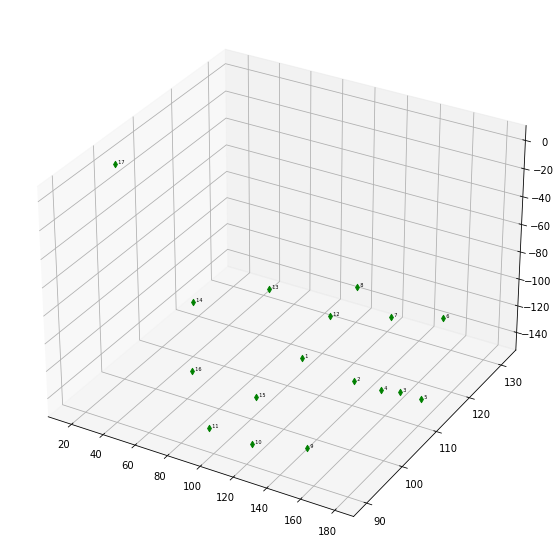

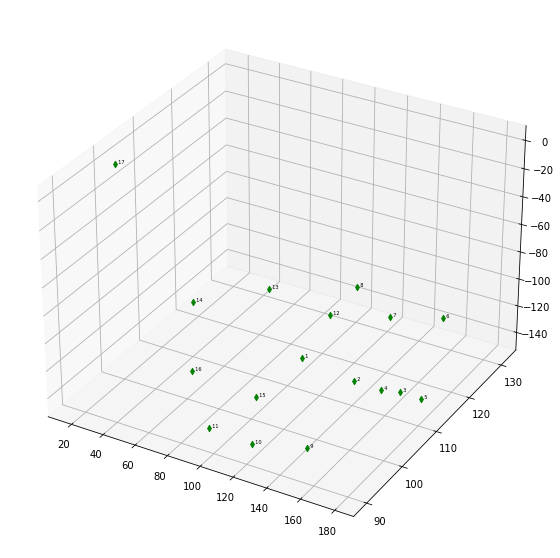

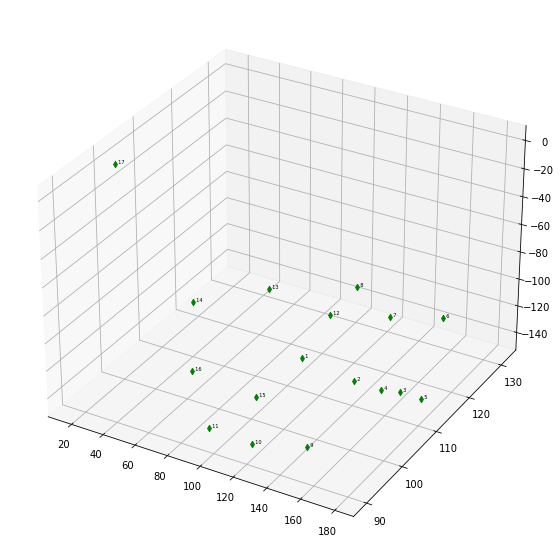

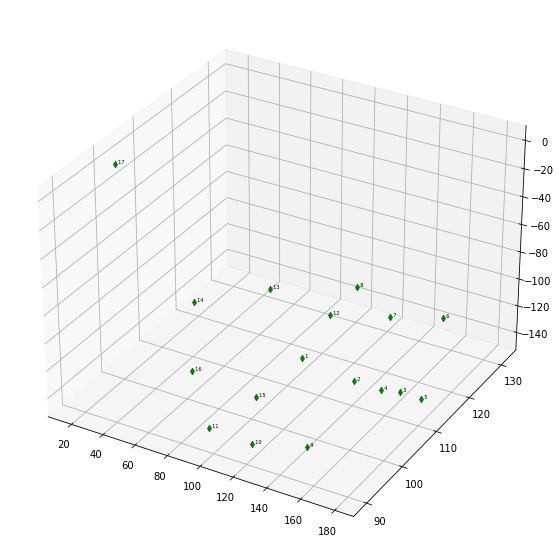

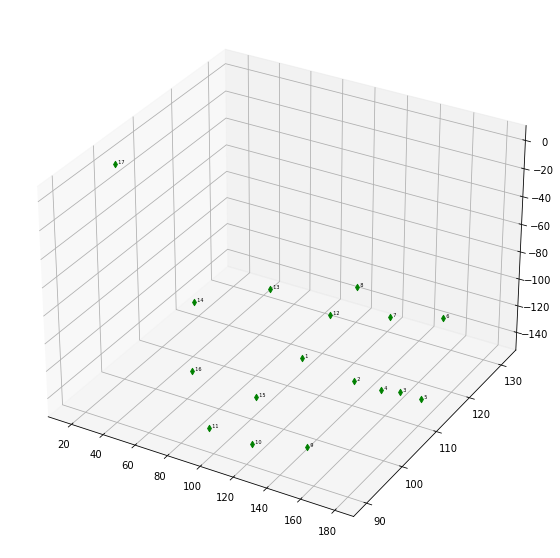

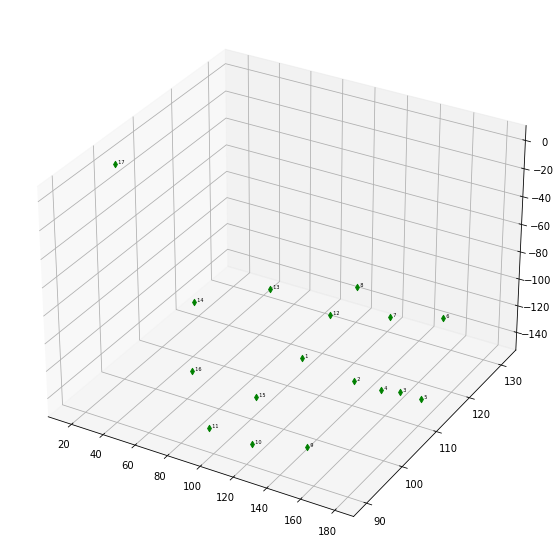

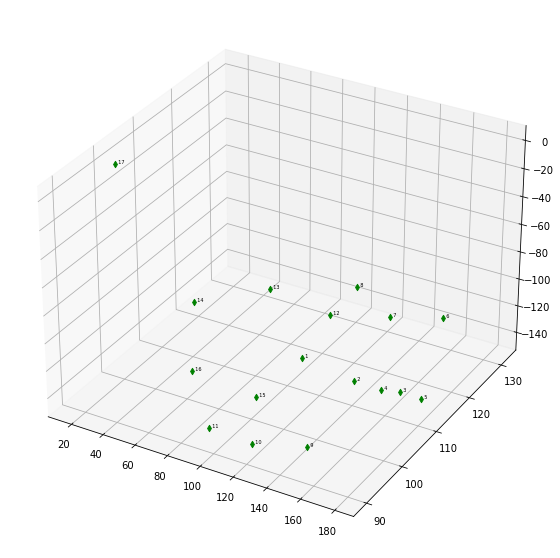

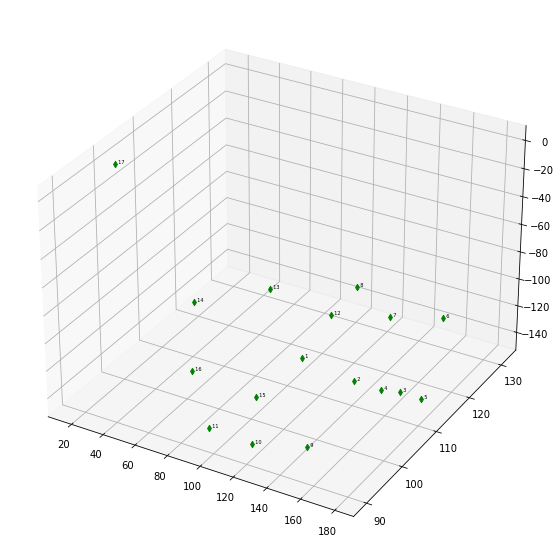

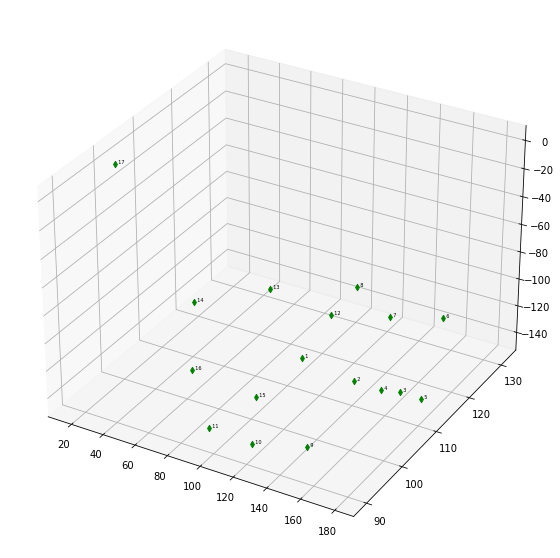

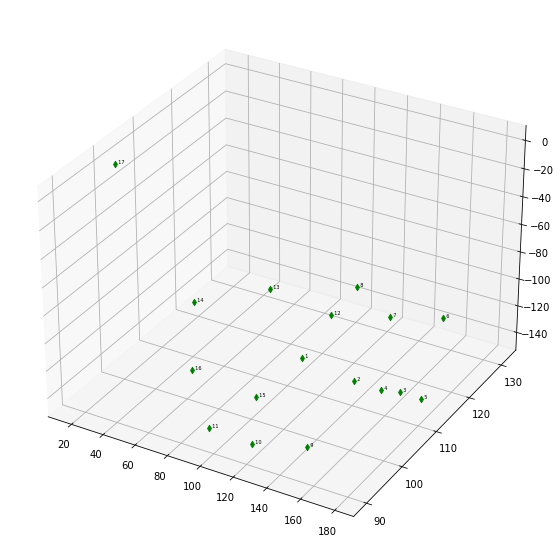

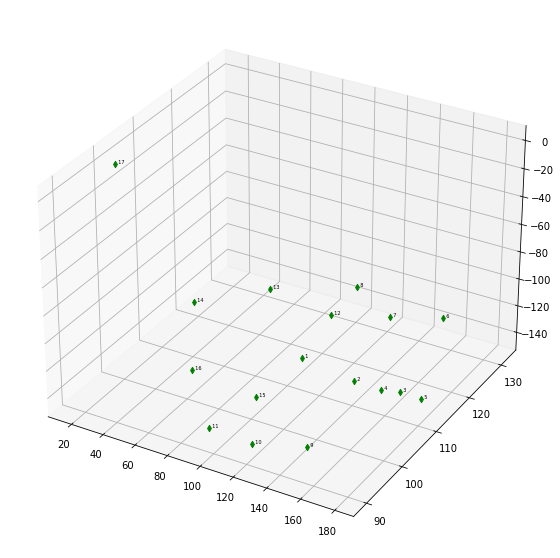

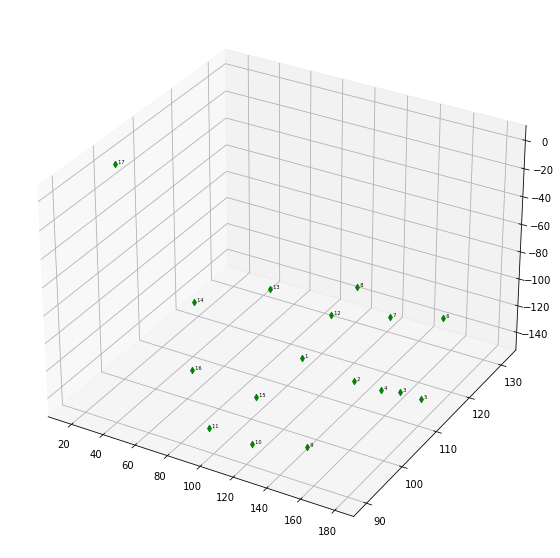

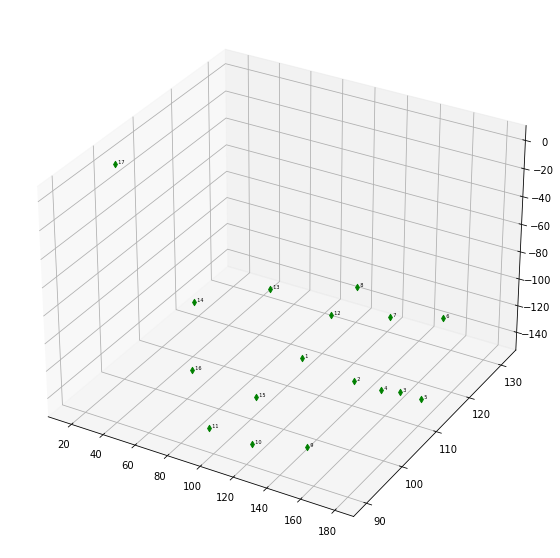

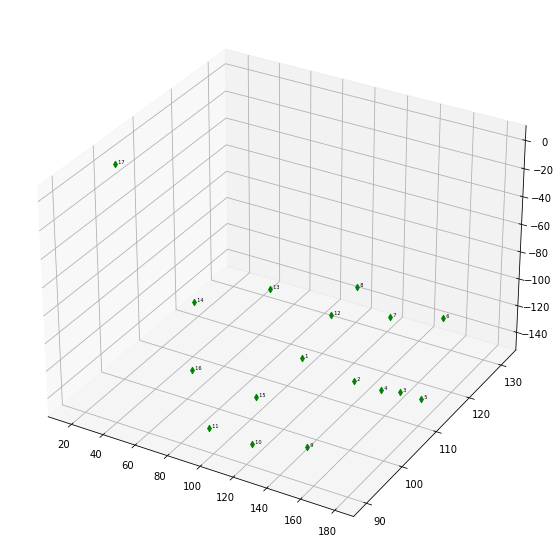

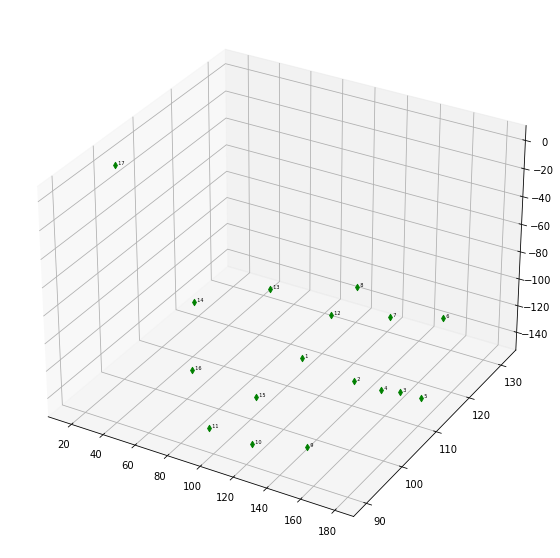

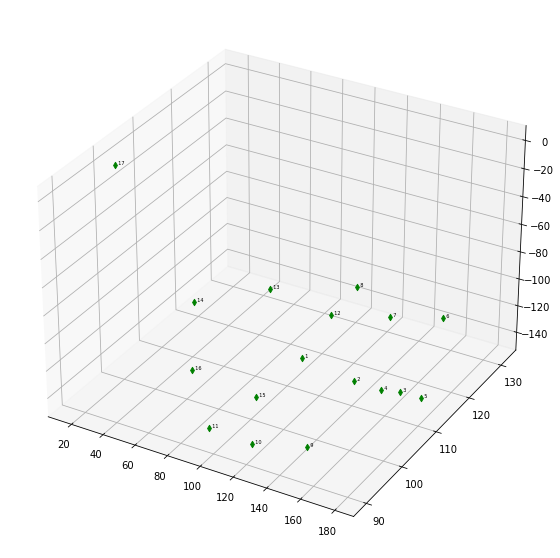

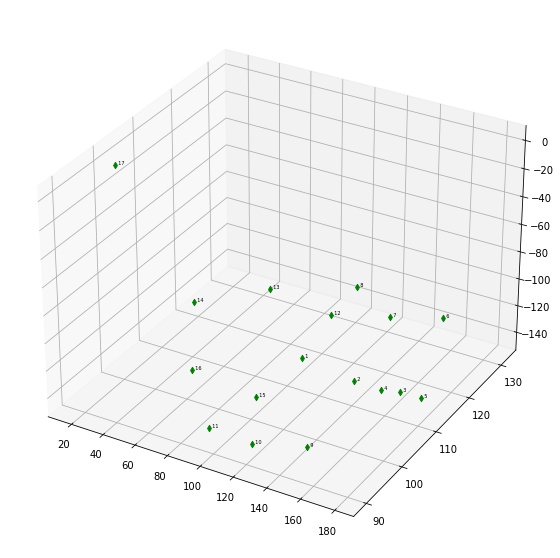

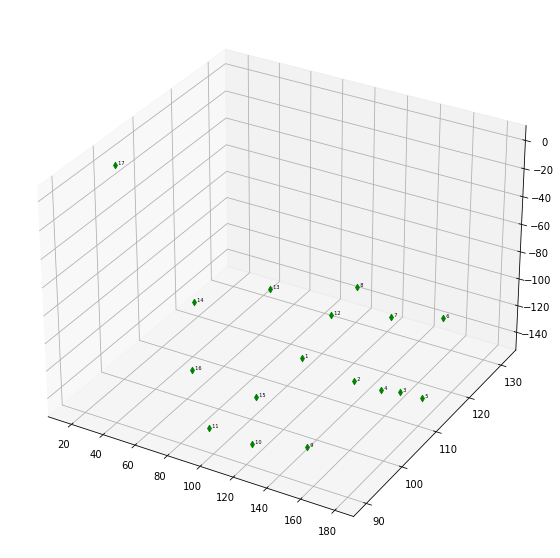

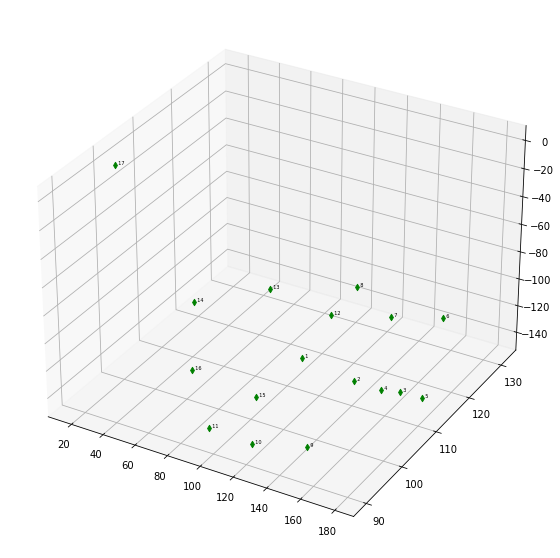

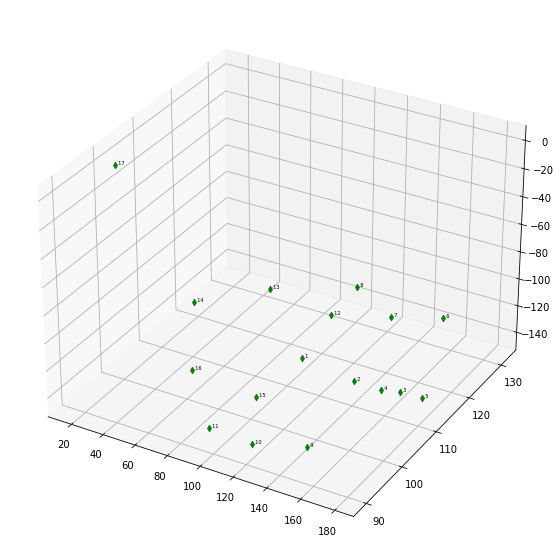

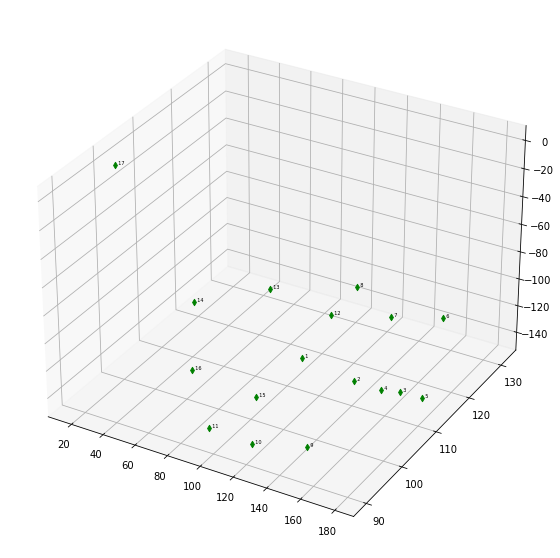

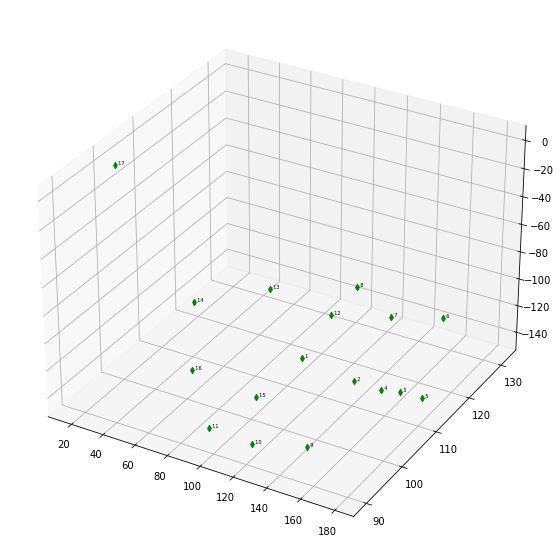

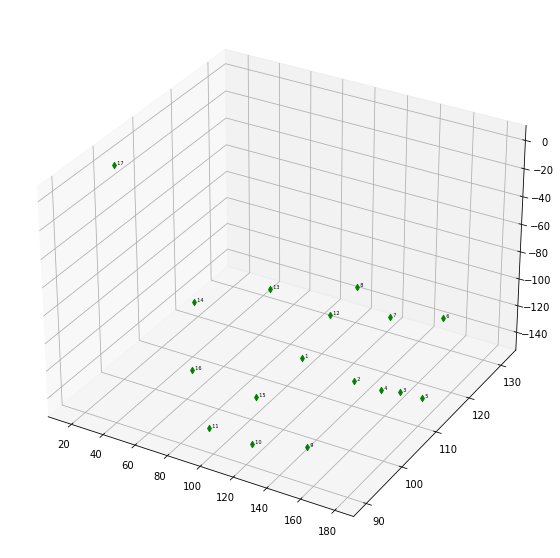

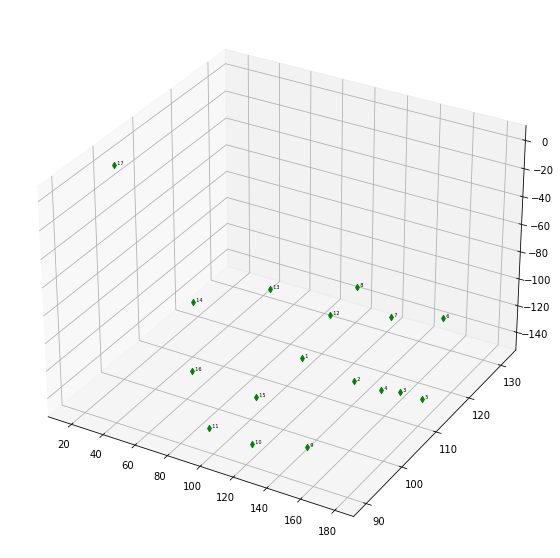

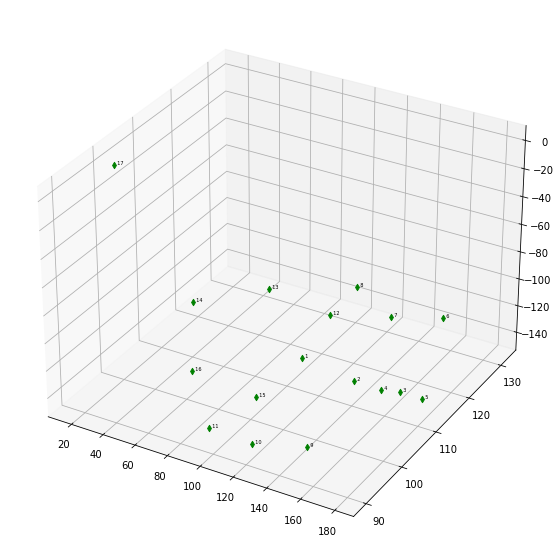

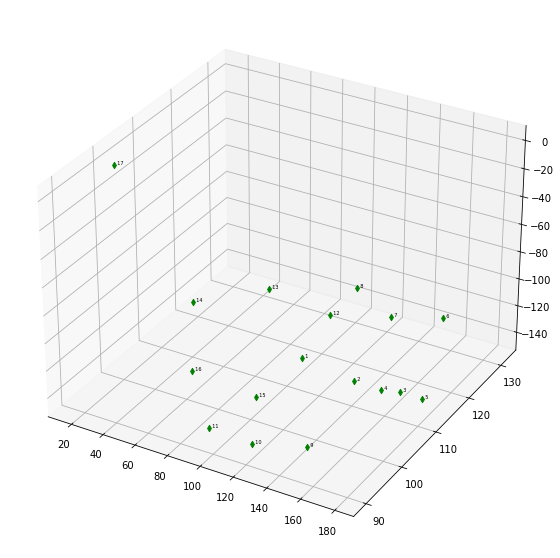

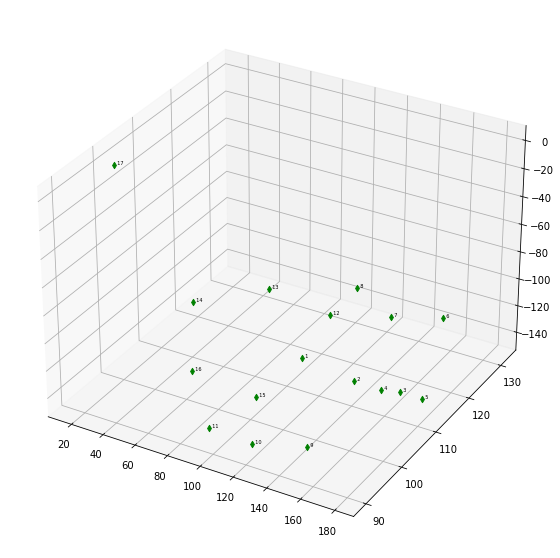

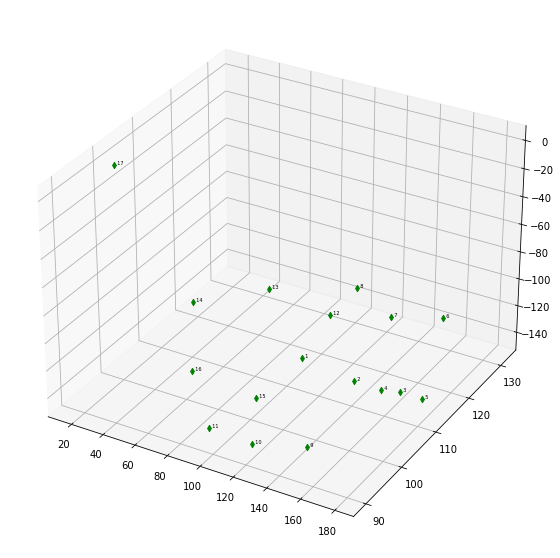

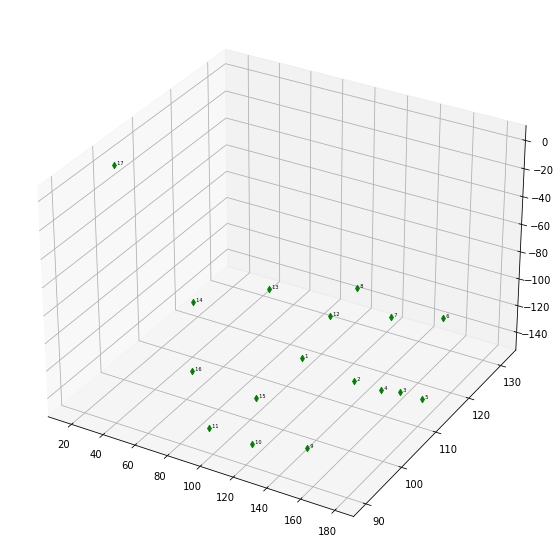

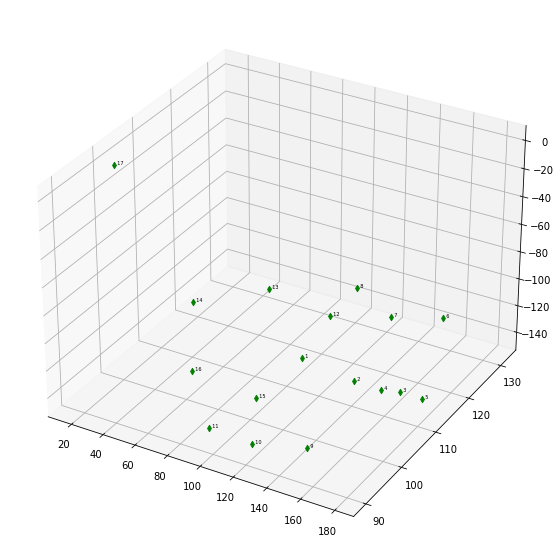

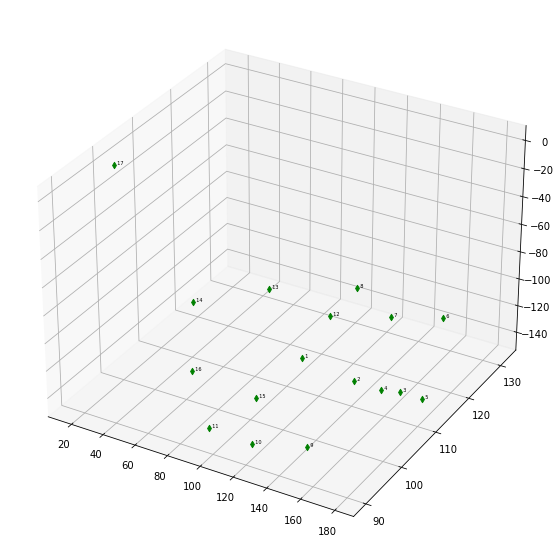

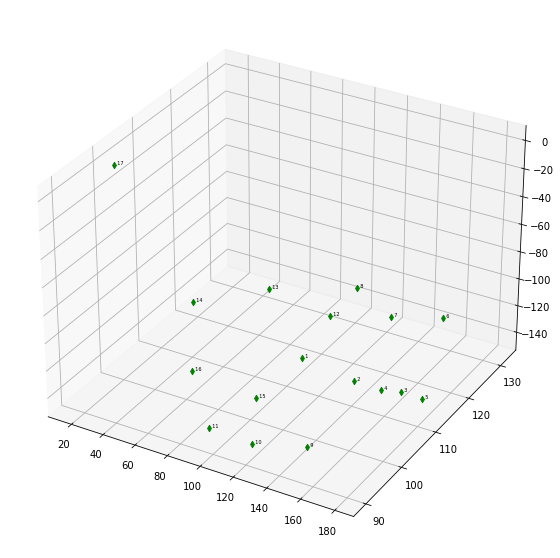

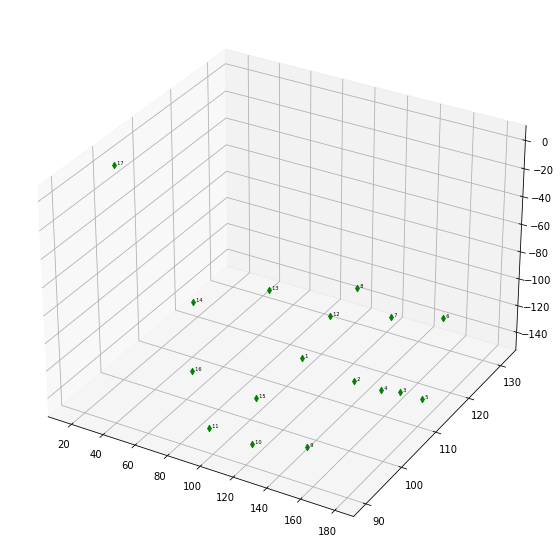

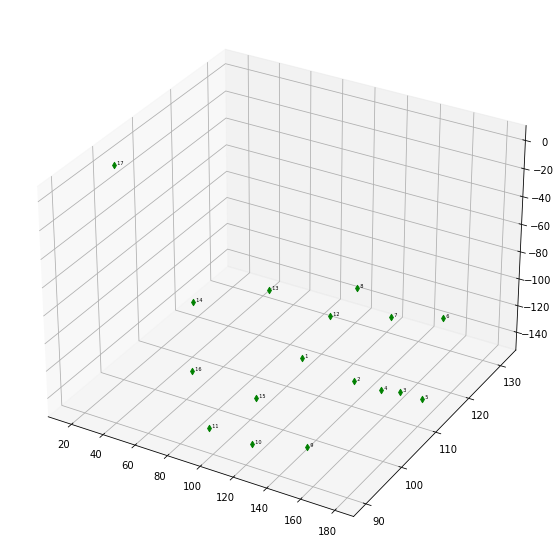

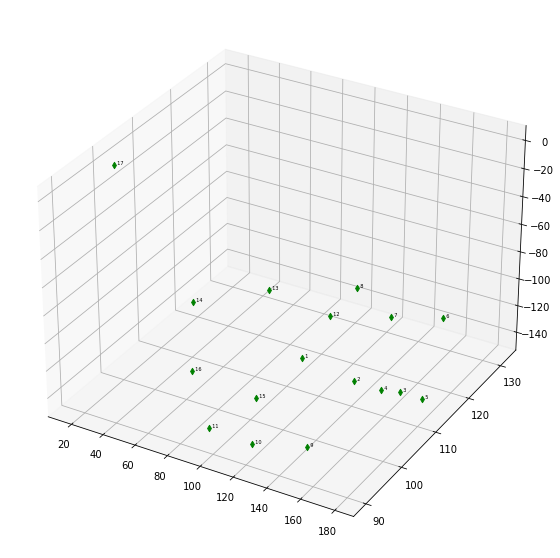

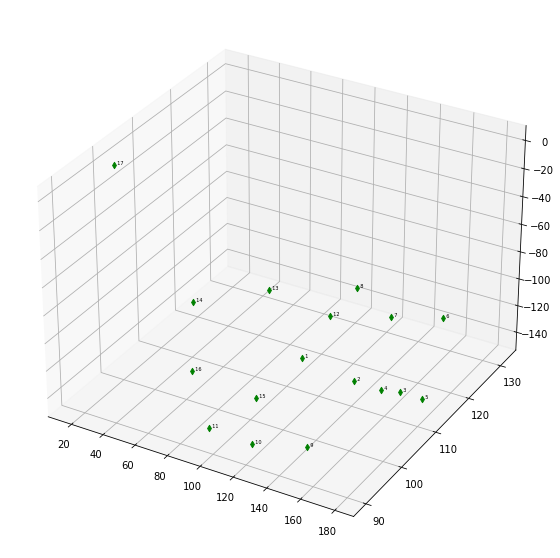

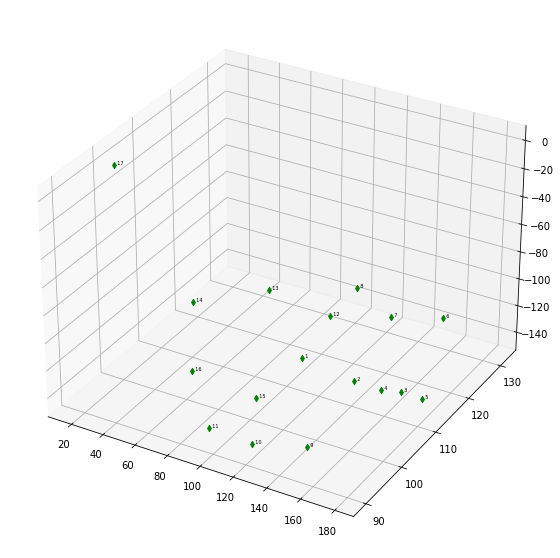

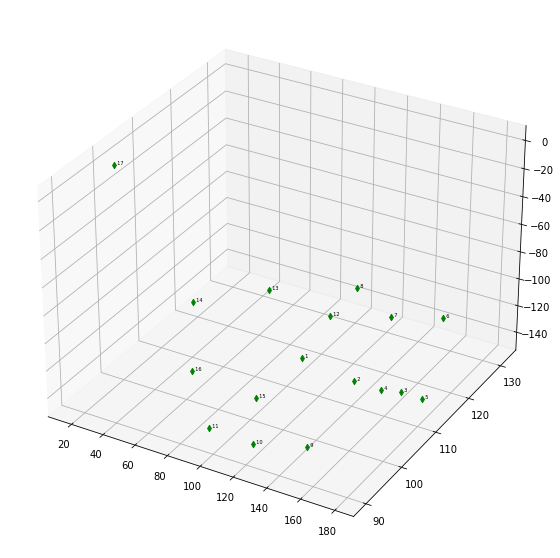

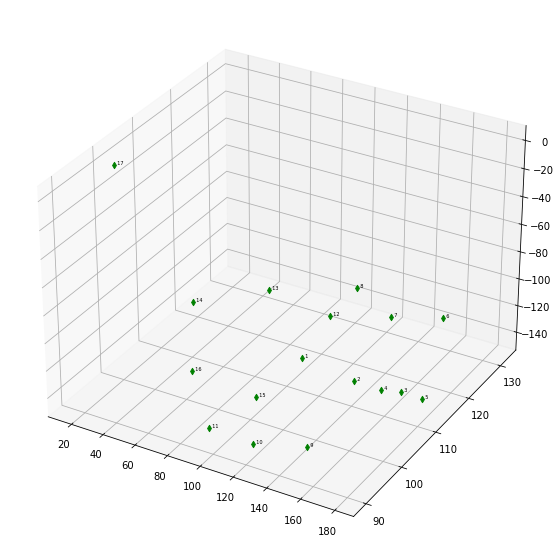

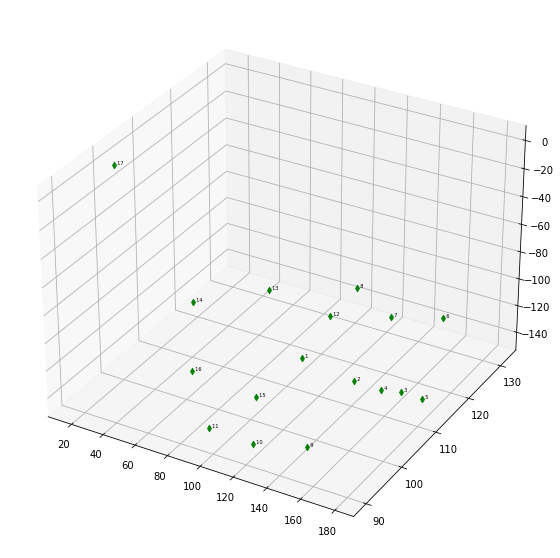

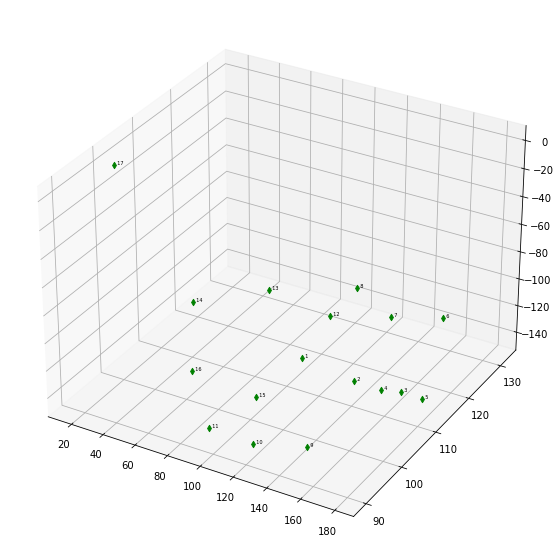

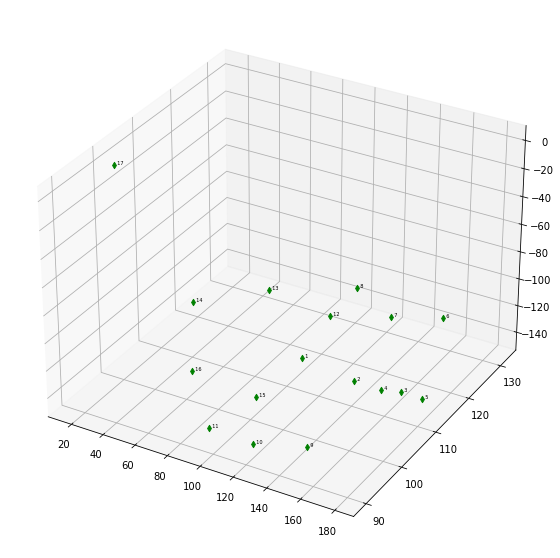

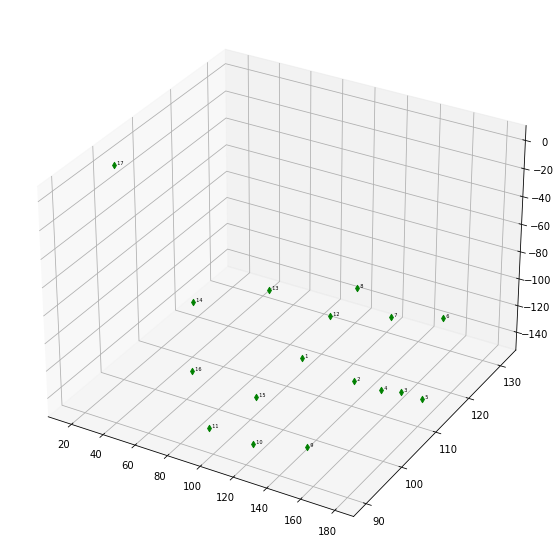

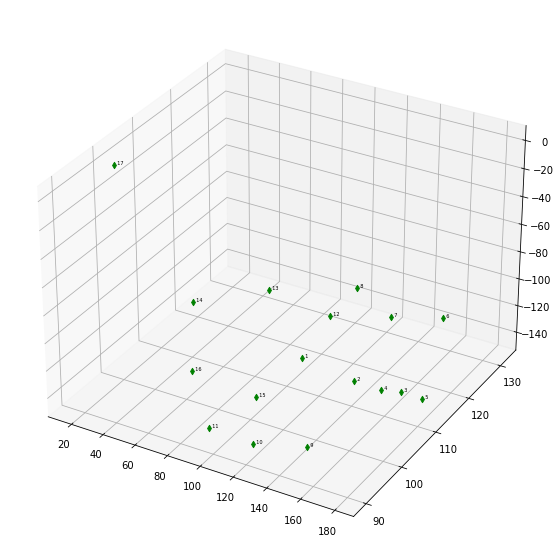

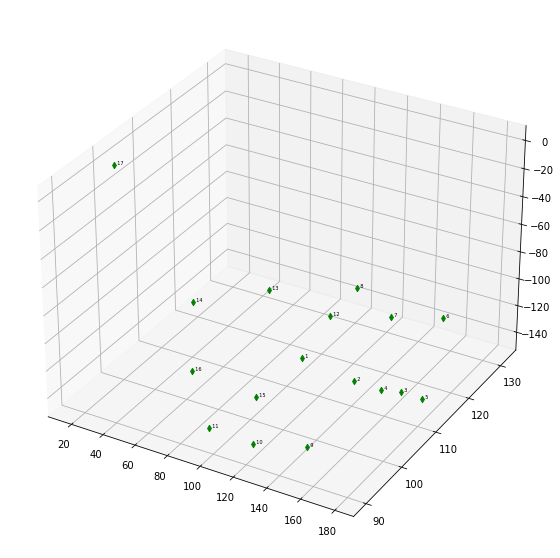

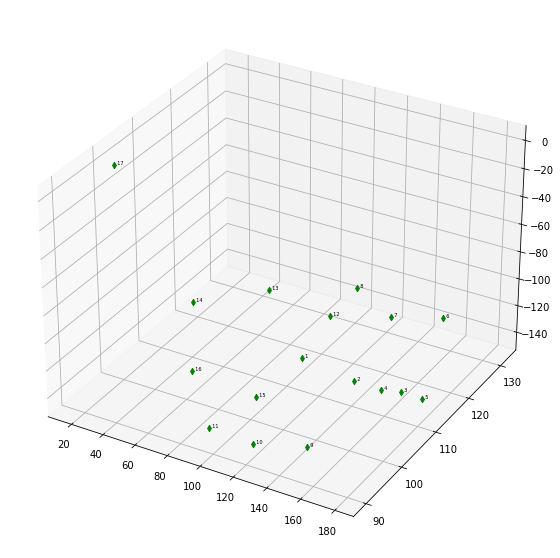

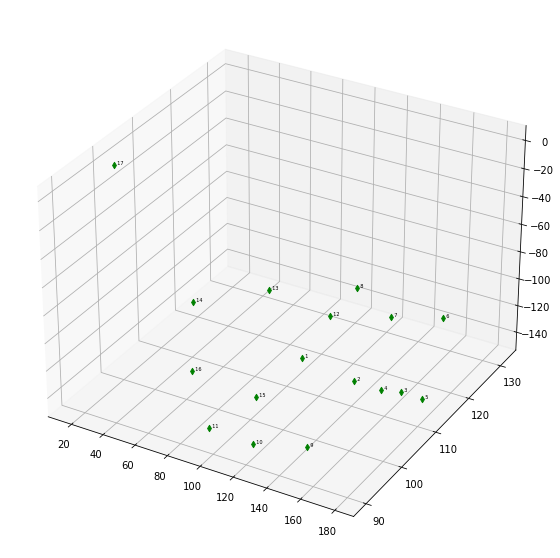

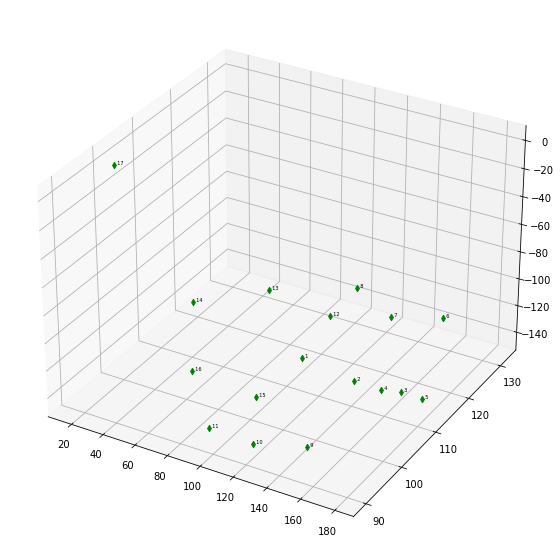

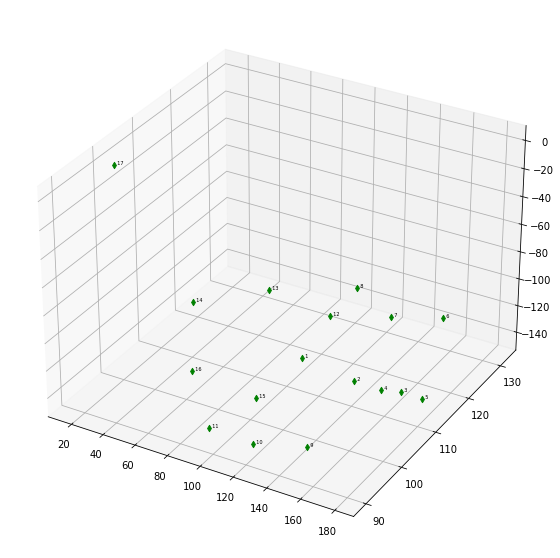

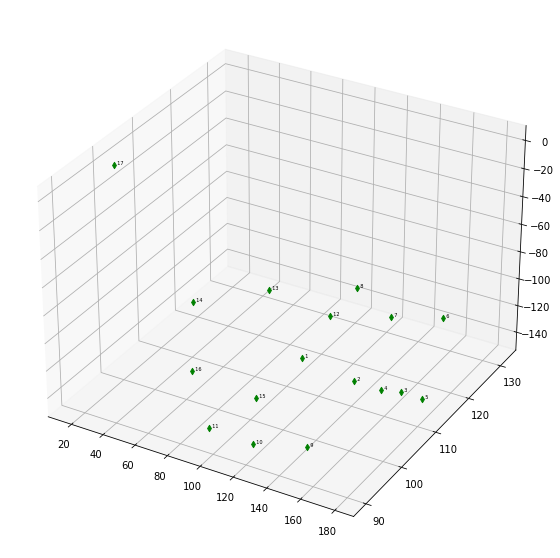

In [149]:
l=data.shape[0]
for i in range (50) :
    df= data_to_df (data, i)
    fig, ax = new_figure()
    plot_all_sensors_with_numbers(df,ax)
    #plot_all_segments(df,ax)
    #ax.view_init(0, -35)
    #plot_head (data,ax,i)
    #s= str (i)
    #fig.savefig(s,dpi=500)